# Bike Sharing Assignment
## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Step 1: Reading and Understanding the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

# Load the dataset
bike=pd.read_csv("day.csv")

In [2]:
bike.shape

(730, 16)

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for null values in each column
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values are present in the dataset 

In [7]:
# Checking for any remaining duplicates
bike.duplicated().sum()

0

There are no duplicates are present in the dataset 

In [8]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike.head(-1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


### Step 2: Performing EDA and data visualisation

### Removing redundant & unwanted columns
1. instant column: It is index value for the row
2. dteday: It has the date, but since we already have year and month column, it's not required
3. casual and registered: Both of column is break of cnt column That's why not needed

In [10]:
bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [11]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
bike.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Categorical variables are already in place - 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- year : year(0: 2018, 1:2019)
- month ( 1 to 12)
- weathersit (1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain')
- workingday : weekend or holiday: 1, Weekday: 0.


In [13]:
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [15]:
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


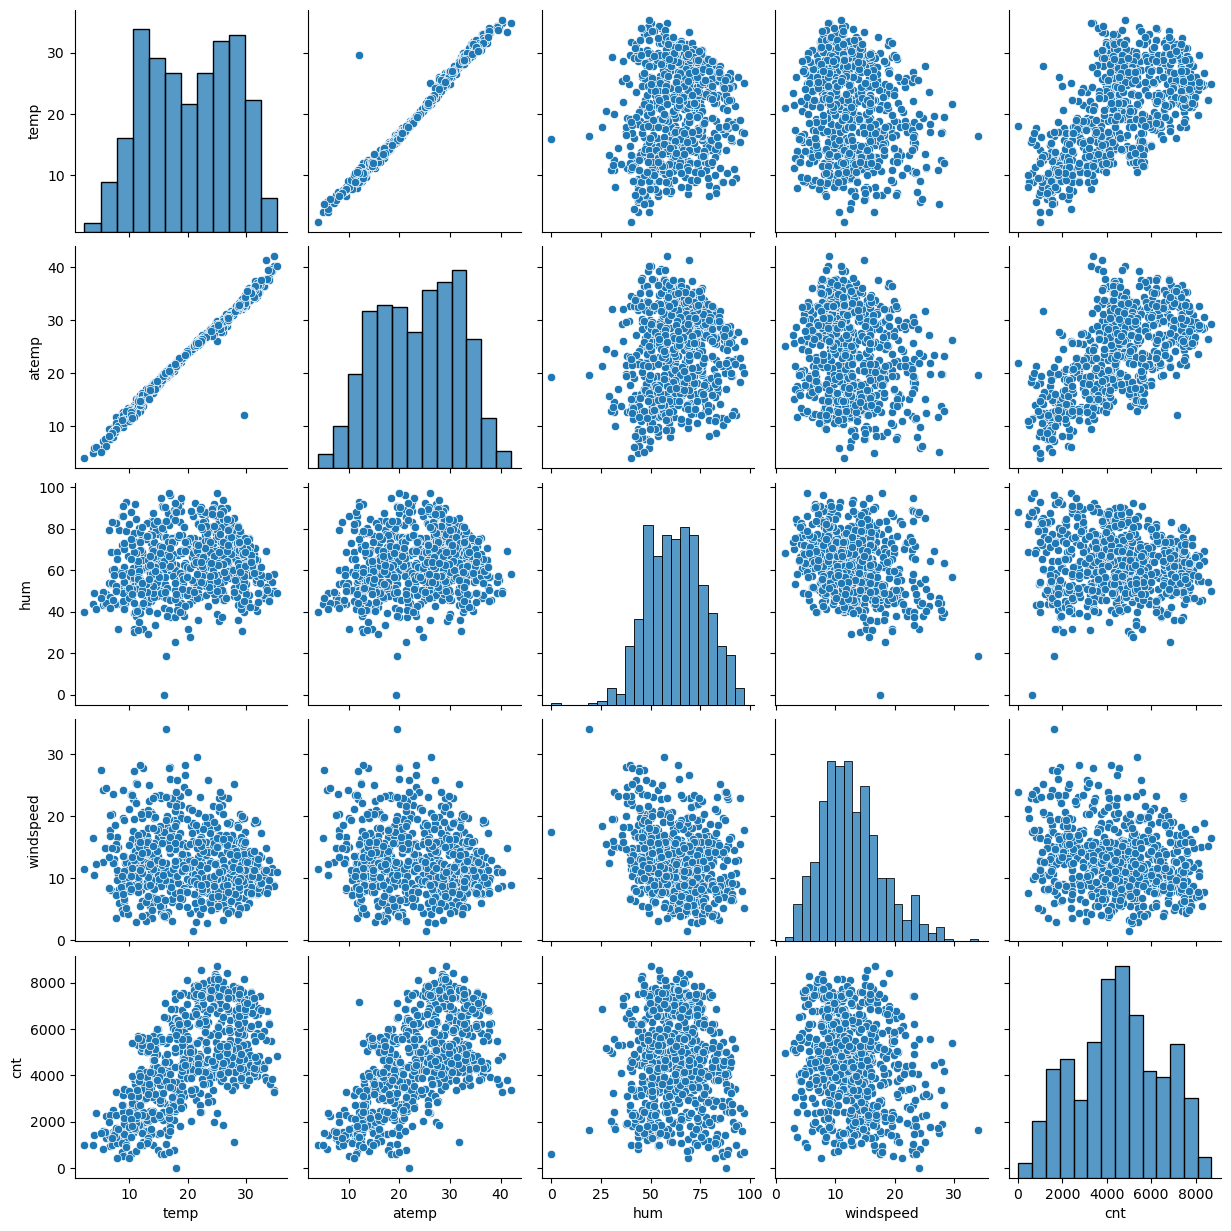

In [19]:
#Visualizing the Numerical variables
sns.pairplot(data=bike, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Key Observations:

1. temp and atemp: These variables are highly correlated, showing a strong linear relationship.
2. cnt vs temp and atemp: Positive correlation exists. As temperature increases, the count (cnt) also tends to increase.
3. cnt vs hum and windspeed: These variables show a weak or no clear relationship with the count. The scatter plots appear dispersed.
4. hum and windspeed distributions: Both appear slightly skewed.
#### Histograms:
1. cnt has a somewhat right-skewed distribution, suggesting that most counts cluster at lower to mid values.
2. temp and atemp are evenly distributed, while hum and windspeed show a more centralized spread.


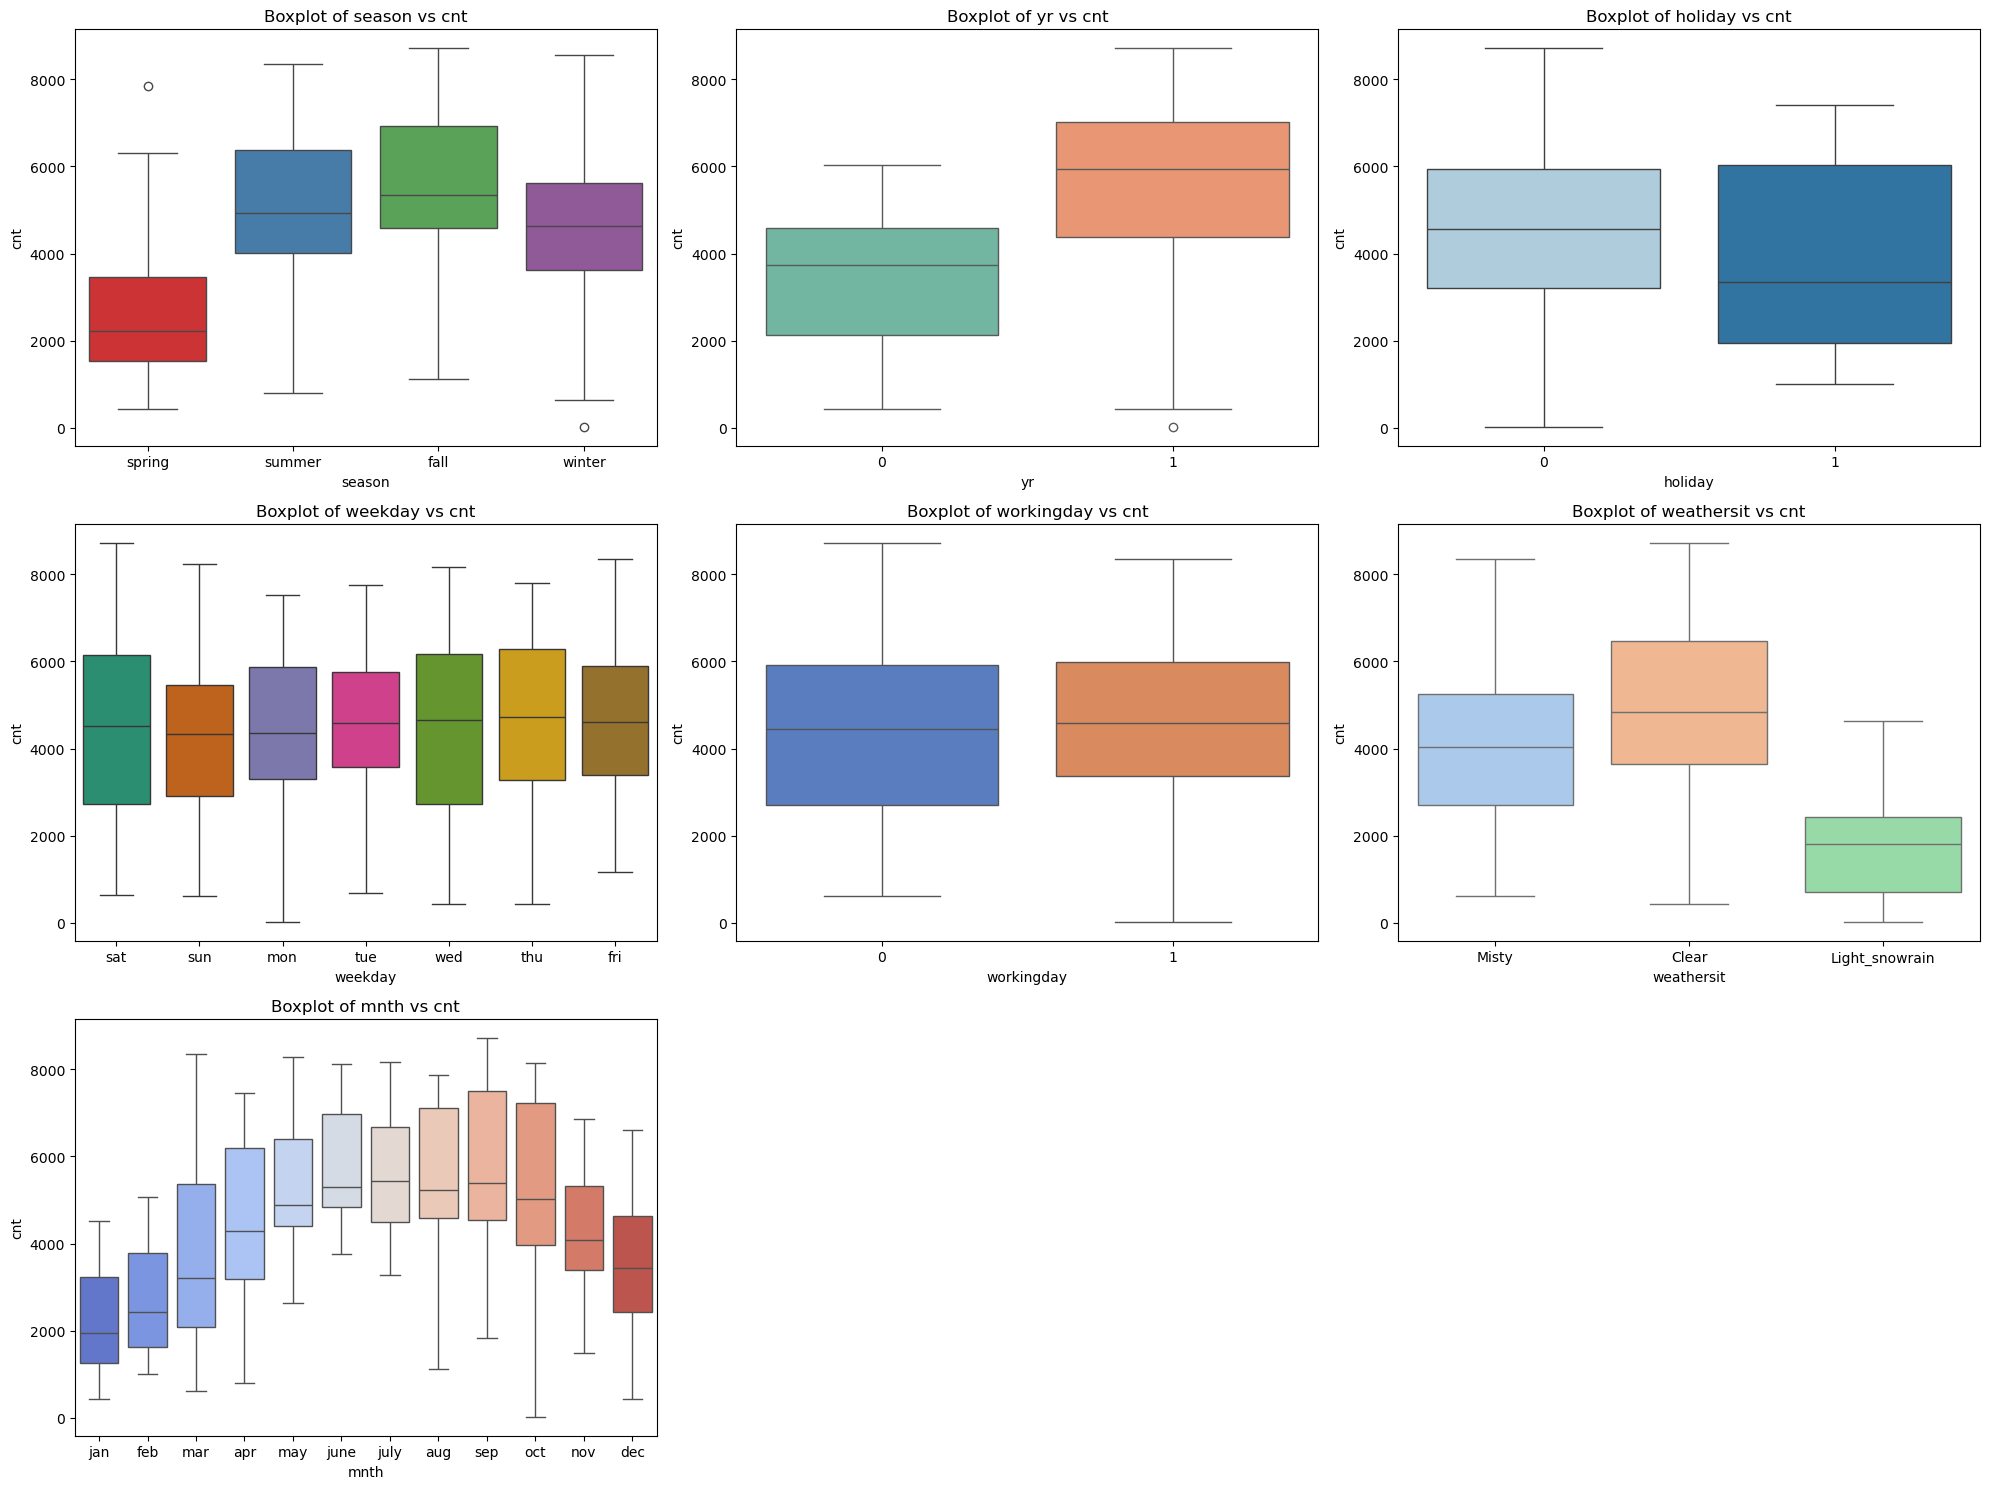

In [20]:
# Visualizing categorical Variable
columns = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

# Set up the figure size and subplots grid (1 row, 7 columns)
plt.figure(figsize=(20, 15))  # Adjusted height to fit in a row

# Define a list of color palettes to use for each plot
color_palettes = ['Set1', 'Set2', 'Paired', 'Dark2', 'muted', 'pastel', 'coolwarm']

# Loop through each column and create a boxplot with a different color palette
for i, (col, palette) in enumerate(zip(columns, color_palettes), 1):
    plt.subplot(3, 3, i)  # 1 row, 7 columns
    # Using 'hue' to set the palette and setting 'legend=False'
    sns.boxplot(x=col, y='cnt', data=bike, hue=col, palette=palette, legend=False)
    plt.title(f'Boxplot of {col} vs cnt')

# Show the plots
plt.tight_layout()
plt.show()

In [21]:
def draw_bar_plots(column):
    plt.figure(figsize = (12, 5))
    
    # First subplot: column vs cnt (without year)
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike, palette='Set2')
    plt.title(f'{column} vs cnt')
    # Second subplot: column vs cnt by year
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', hue='yr', data=bike, palette='pastel')
    plt.title(f'{column} vs cnt by Year')
    plt.legend(labels=['2018', '2019'])

    # Show the plot
    plt.tight_layout()
    plt.show()



In [22]:
# List of columns to create plots for
columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

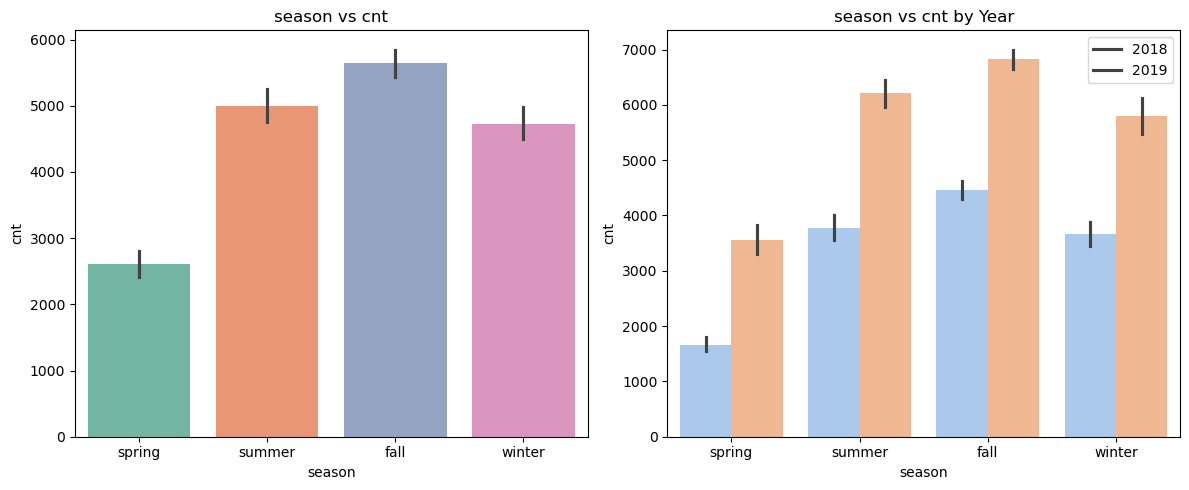

In [23]:
draw_bar_plots('season')

- Fall (Season 3) has the highest median counts of all seasons, indicating peak activity during this both years.
- Summer (Season 2) also sees relatively high counts, though slightly lower than Fall.

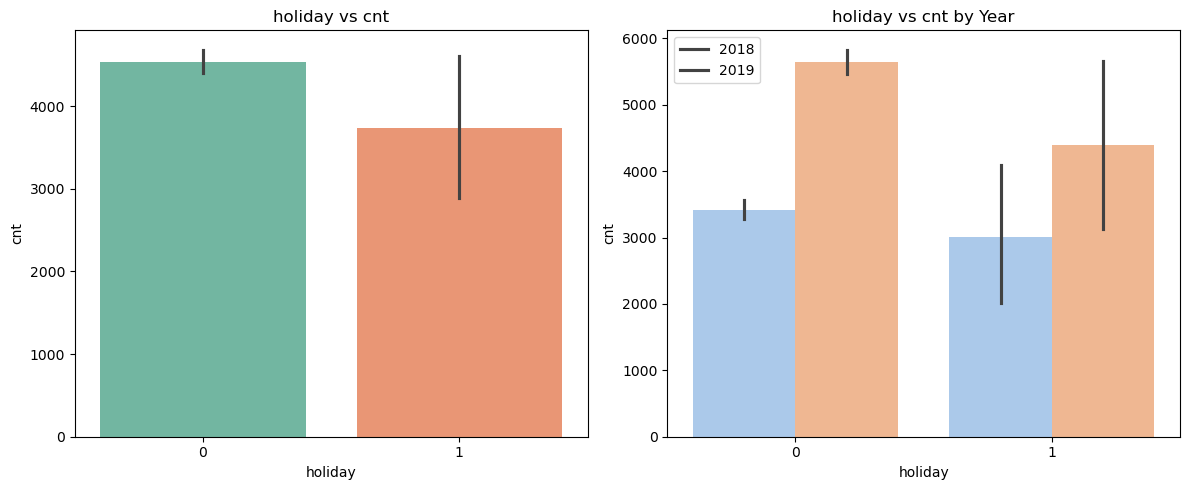

In [24]:
draw_bar_plots('holiday')

- Non-holidays show a higher median and wider range of counts.

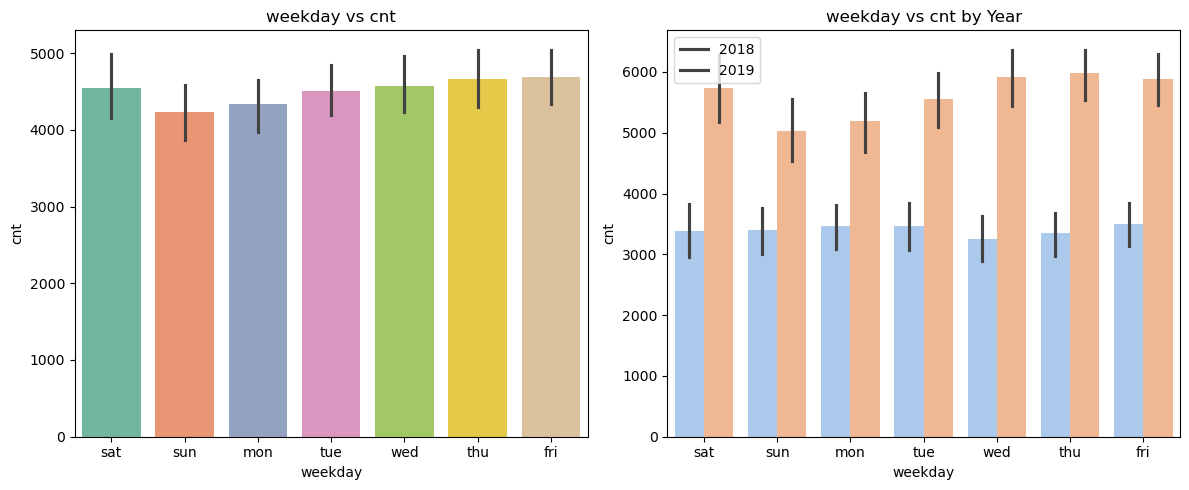

In [25]:
draw_bar_plots('weekday') 

- Counts are fairly consistent across weekdays, showing no significant variation for both years
- In above boxplot, Median counts remain stable, suggesting weekdays do not strongly influence bike rentals.

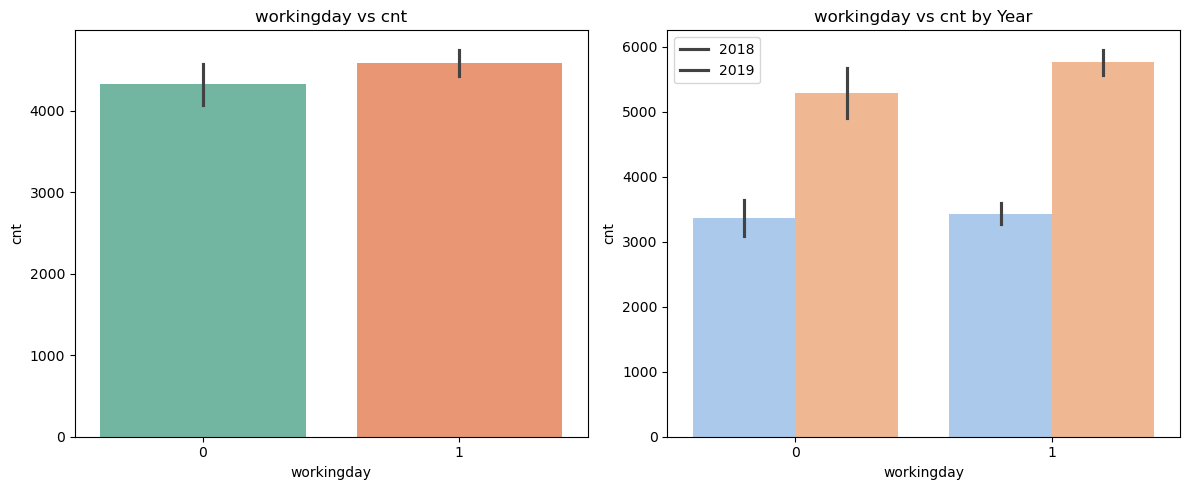

In [26]:
draw_bar_plots('workingday')

- Counts are similar on both working days and non-working days.

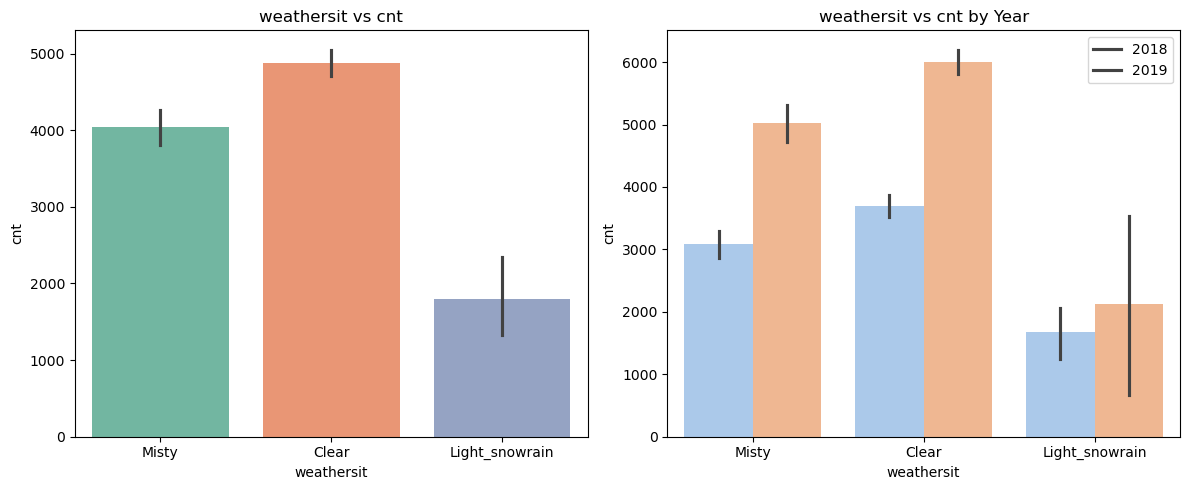

In [27]:
draw_bar_plots('weathersit')

- Clear weather (1): Shows the highest median counts and widest range.

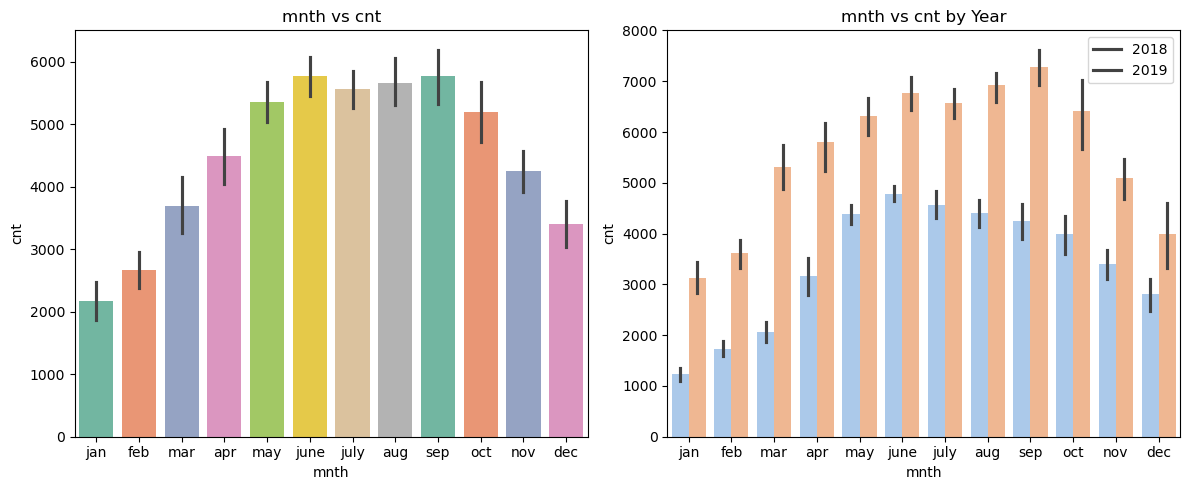

In [28]:
draw_bar_plots('mnth')

- Counts are highest between months 5 to 9 (late spring to early autumn) for both year.
- Counts drop significantly in months 1, 2, 11, and 12 (likely winter months)for both year.

### Conclusion: 
1. The Fall season has the highest median that shows the demand was high during this season.
2. The count of users is less during the holidays
3. The counts are similar on both working days and non-working days.
4. The Clear weather Shows the highest median counts and widest range.
5. The year 2019 had a higher count of users as compared to the year 2018
6. The counts are highest between months 5 to 9.

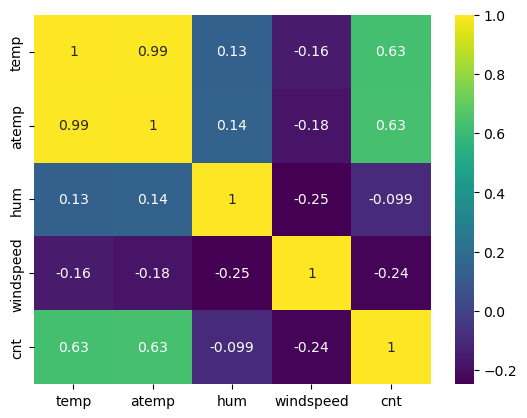

In [29]:
# checking the correlation between the columns
correlation_matrix = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)
plt.show()

There is corelation present between temp & atemp variable. 

In [30]:
# correlation between temp and atemp
bike[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


Since, the correlation between temp and atemp is almost 1, one of them could be dropped, But we will first calculate the VIF then decide.

### Step 3: Create a dummy Variable for categorical column

In [31]:
mnth_bike=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike.season,drop_first=True)

In [32]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
bike_df = pd.concat([bike,mnth_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)

In [34]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


In [35]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [36]:
bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [37]:
bike_df.shape

(730, 30)

In [38]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

#### Step 4: Splitting the Data into Training and Testing Sets

In [39]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [40]:
# Checking shape of training and test dataset
bike_train.shape

(510, 30)

In [41]:
bike_test.shape

(220, 30)

In [42]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [43]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [44]:
# Fit and transform the data
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [45]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [46]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


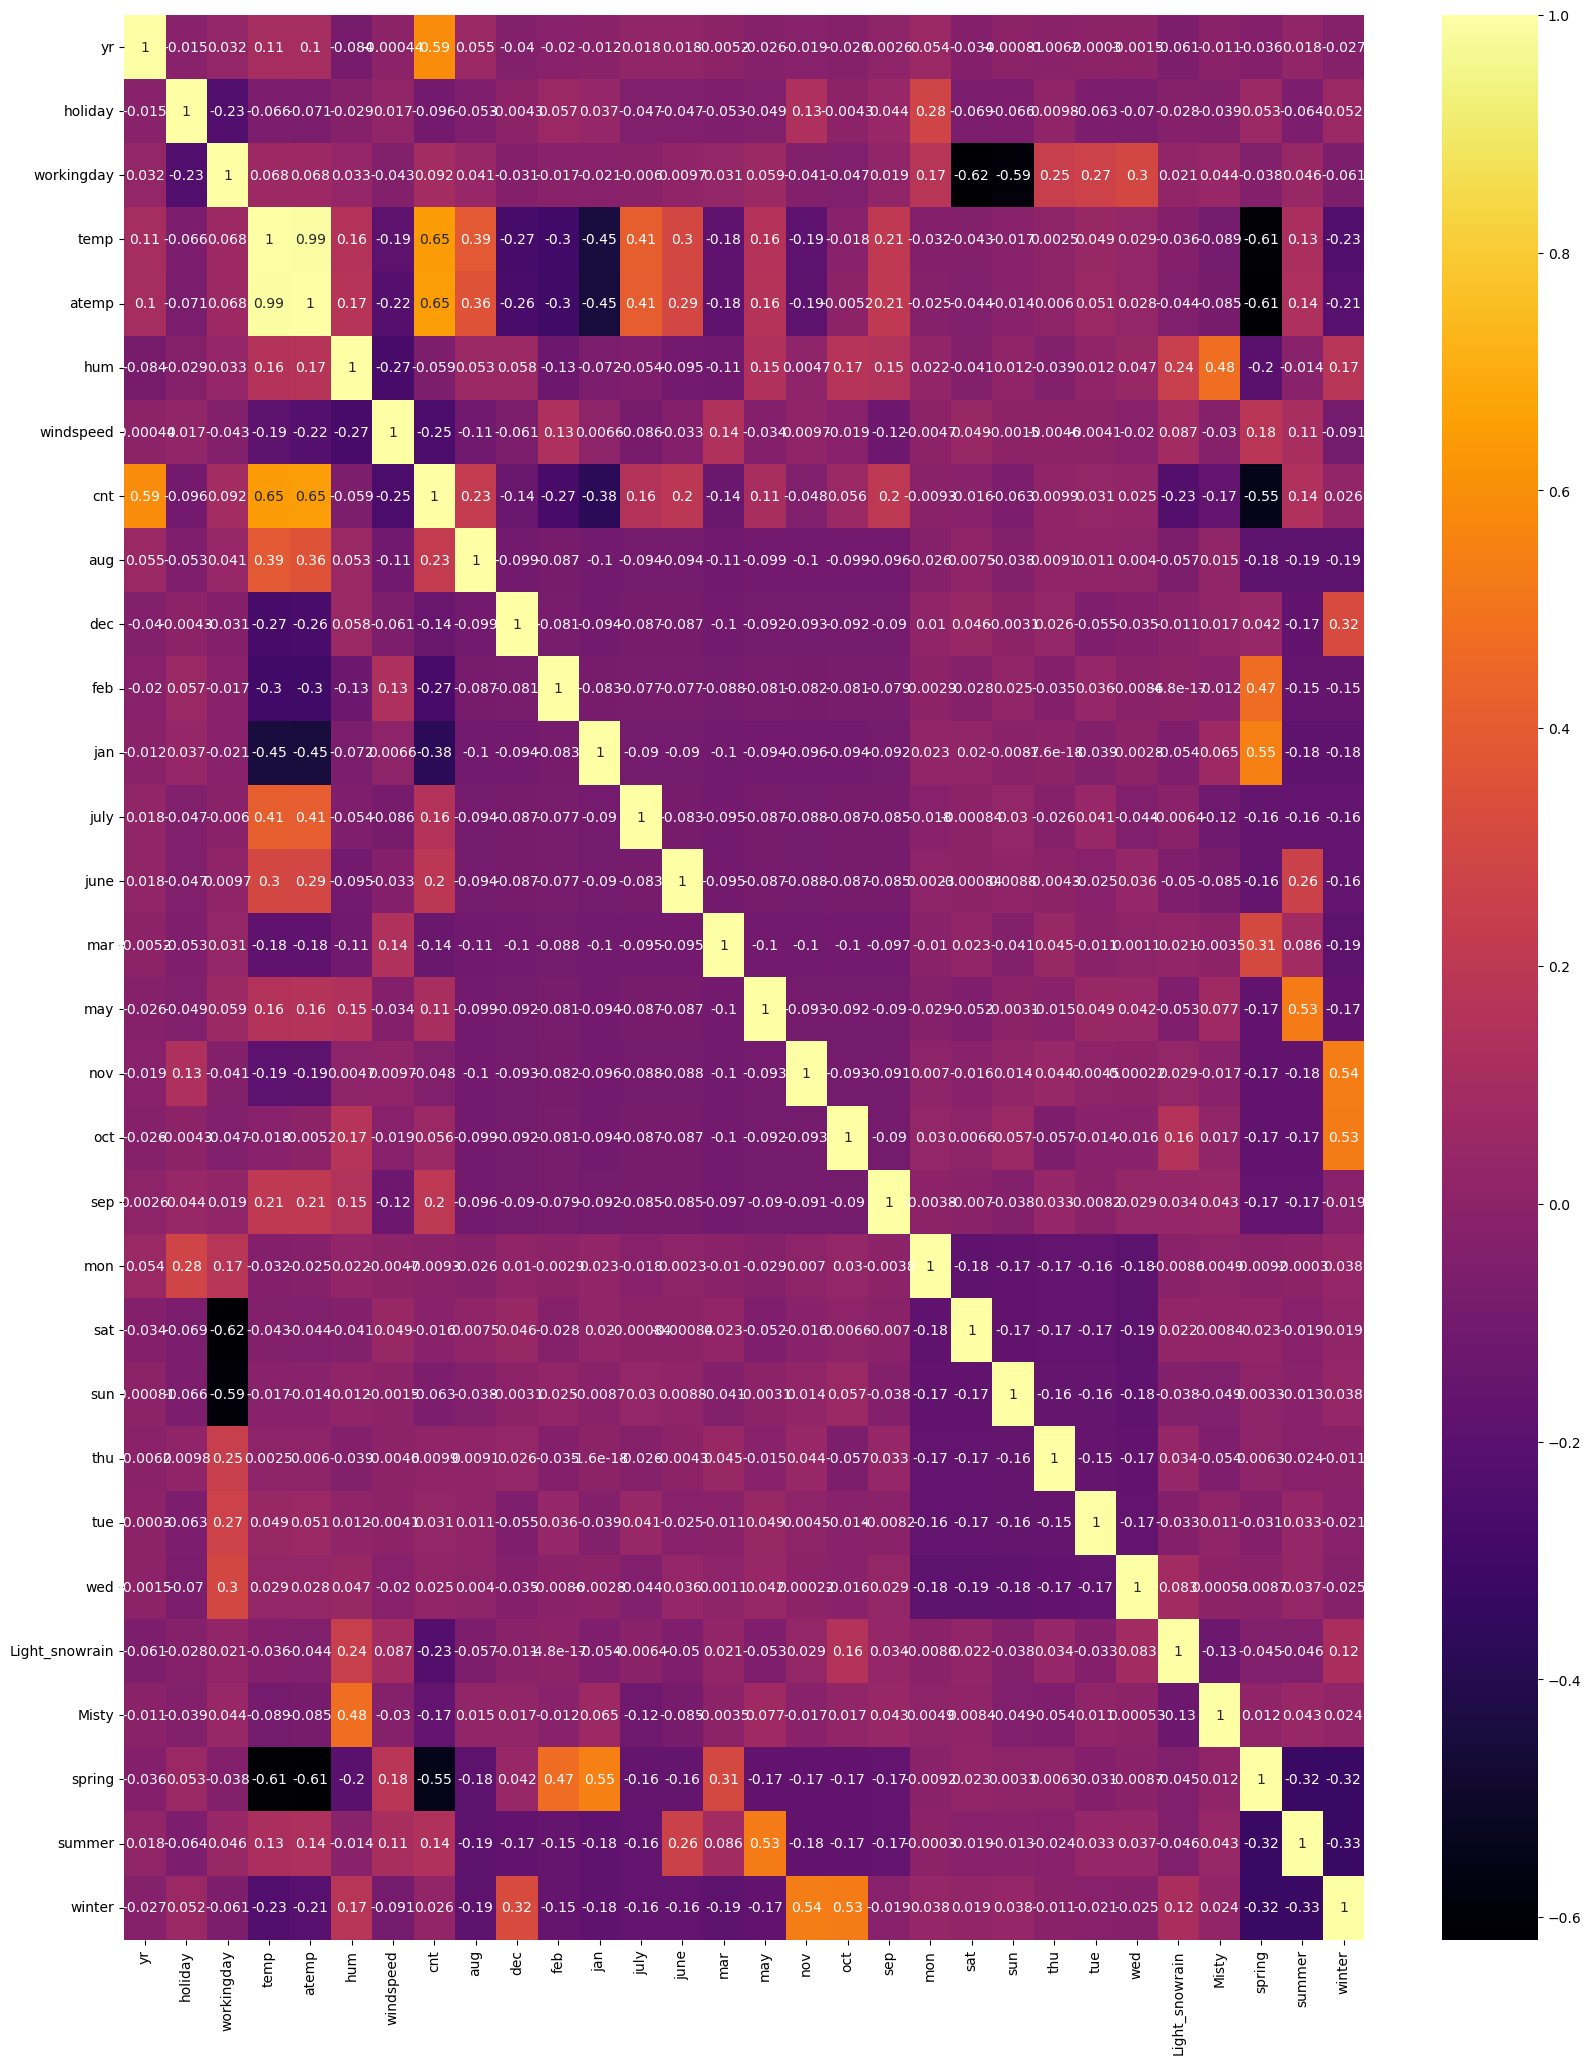

In [47]:
# Plot Corelation heatmap
plt.figure(figsize = (20, 25))
sns.heatmap(bike_train.corr(), annot = True, cmap="inferno")
plt.show()

Highest correlation seen in temp and atemp with cnt followed by yr. We will create visualize temp vs cnt and build the model using all columns.

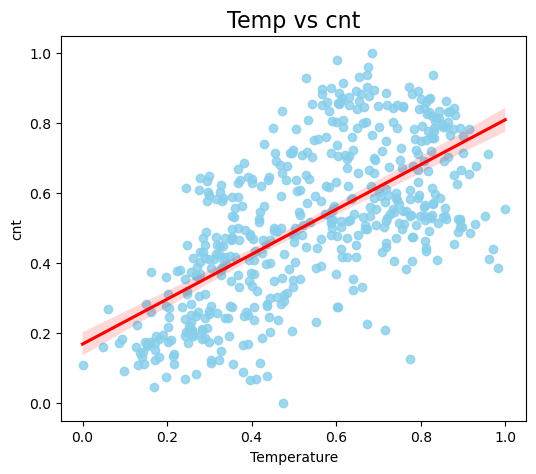

In [48]:
# visualizing correlation of temp vs cnt
plt.figure(figsize=(6,5))
plt.title("Temp vs cnt", fontsize=16)
sns.regplot(data=bike_train, y="cnt", x="temp", 
            scatter_kws={'color': 'skyblue'},  # Color of scatter points
            line_kws={'color': 'red'})  # Color of the regression line
plt.xlabel("Temperature")
plt.show()

In [49]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Step 5: Building a linear model
- We are using the Recursive Feature Elimination (RFE) method to select the important features and then building the model using the Statsmodels library.

In [50]:
# create a Linear Regression Model:
lm = LinearRegression()

# fit the model to the training data:
lm.fit(X_train, y_train)

# create an RFE object:
rfe = RFE(lm, n_features_to_select=15)

# fit the RFE model to the training data:
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', False, 3),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 6),
 ('june', False, 15),
 ('mar', False, 7),
 ('may', False, 5),
 ('nov', False, 4),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 13),
 ('summer', True, 1),
 ('winter', True, 1)]

In [52]:
# Selected variable via RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'aug', 'jan',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'summer', 'winter'],
      dtype='object')


In [53]:
X_train.columns[~rfe.support_]

Index(['atemp', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'spring'],
      dtype='object')

In [54]:
# defining function to calculate VIF of variables:
def calculate_VIF(bike):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [55]:
X_train_rfe = X_train[col]

In [56]:
print(X_train_rfe.isnull().sum())

yr                0
holiday           0
workingday        0
temp              0
hum               0
windspeed         0
aug               0
jan               0
sep               0
sat               0
sun               0
Light_snowrain    0
Misty             0
summer            0
winter            0
dtype: int64


In [57]:
print(X_train_rfe.dtypes)

yr                  int64
holiday             int64
workingday          int64
temp              float64
hum               float64
windspeed         float64
aug                  bool
jan                  bool
sep                  bool
sat                  bool
sun                  bool
Light_snowrain       bool
Misty                bool
summer               bool
winter               bool
dtype: object


In [58]:
X_train_rfe = X_train_rfe.astype({col: 'int64' for col in X_train_rfe.select_dtypes(include='bool').columns})

In [59]:
# building 1st linear regression model:
# adding a constant because statsmodels does not add a constant term (intercept) by default:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.01e-191
Time:                        19:49:26   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1727      0.023      7.

In [60]:
# calculate VIF for the new model
calculate_VIF(X_train_rfe)

,Features,VIF
2,workingday,34.00
9,sat,8.38
10,sun,8.20
1,holiday,2.24
3,temp,1.94
4,hum,1.88
14,winter,1.58
12,Misty,1.56
7,jan,1.55
13,summer,1.48


- workingday has highest VIF value , will remove the column

In [61]:
# dropping 'workingday' column:
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

In [62]:
# building 2nd linear regression model:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.01e-191
Time:                        19:49:26   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2495      0.028      8.

In [63]:
# calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
3,hum,18.41
2,temp,11.43
4,windspeed,3.68
11,Misty,2.17
13,winter,2.05
0,yr,2.04
12,summer,1.96
5,aug,1.60
6,jan,1.55
7,sep,1.32


- hum has the highest VIF value. Removing the hum column

In [64]:
# dropping 'hum' column:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [65]:
# building 3rd linear regression model:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          6.55e-189
Time:                        19:49:26   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1614      0.019      8.

In [66]:
# calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,3.42
0,yr,2.04
11,summer,1.89
4,aug,1.60
12,winter,1.57
10,Misty,1.55
6,sep,1.32
5,jan,1.23
7,sat,1.22


- temp has VIF value > 5 but sat has highest p-value than temp, so removing sat column

In [67]:
# dropping 'sat' column:
X_train_new = X_train_new.drop(['sat'], axis = 1)

In [68]:
# building 4th linear regression model:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          6.83e-190
Time:                        19:49:26   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1635      0.019      8.

In [69]:
# calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,3.36
0,yr,2.04
10,summer,1.89
4,aug,1.60
11,winter,1.56
9,Misty,1.54
6,sep,1.32
5,jan,1.23
7,sun,1.17


- No significance change in temp after removing sat, VIf value is same with 0 p-value. Other than this jan has high p-value. removing jan column

In [70]:
# dropping 'jan' column:
X_train_new = X_train_new.drop(['jan'], axis = 1)

In [71]:
# building 5th linear regression model:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          8.46e-190
Time:                        19:49:26   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1387      0.017      8.

In [72]:
# calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,yr,2.00
9,summer,1.82
4,aug,1.59
8,Misty,1.49
10,winter,1.49
5,sep,1.31
6,sun,1.17
7,Light_snowrain,1.08


- Some signficance change in temp VIF value decrease from 5.14 to 5.09 and p-value is 0. To optimize the model, removing aug which has high p-value than other attribute.

In [73]:
# dropping 'aug' column:
X_train_new = X_train_new.drop(['aug'], axis = 1)

In [74]:
# building 6th linear regression model:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          6.34e-189
Time:                        19:49:26   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1344      0.017      8.

In [75]:
# calculate VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
8,summer,1.57
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


- Signficantly change in temp VIF value after jan removed. We will finalise lr6 as the final model for future prdeictions. 

In [76]:
lr6.params

const             0.134431
yr                0.232752
holiday          -0.106683
temp              0.547114
windspeed        -0.153073
sep               0.099353
sun              -0.049842
Light_snowrain   -0.288321
Misty            -0.080555
summer            0.087801
winter            0.131138
dtype: float64

In [77]:
X_train_lm6

,const,yr,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,1,0


### Step 6: Residual Analysis

In [78]:
y_train_pred = lr6.predict(X_train_lm6)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
8,summer,1.57
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


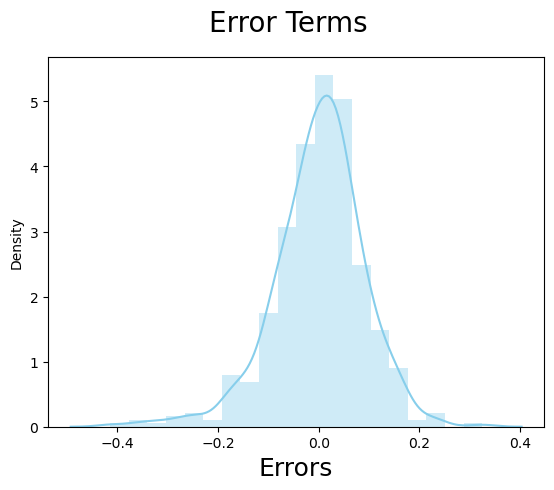

In [79]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20,color='skyblue')
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
# calculate VIF for the new model
calculate_VIF(X_train_new)


- From the graph, we can see that the error terms (residuals) are normally distributed, so our assumption for linear regression is correct.

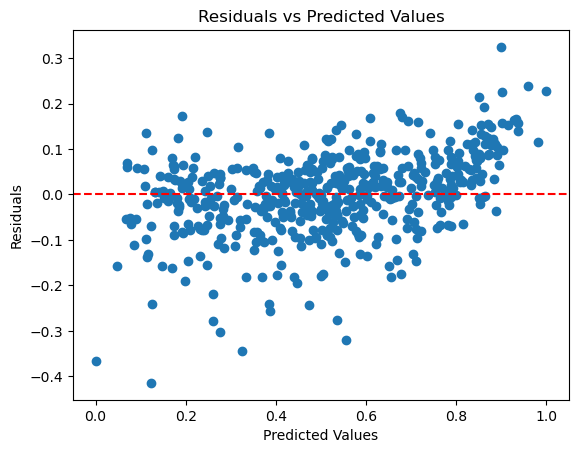

In [80]:
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

- Our model is effective at predicting bike demand. The actual and predicted values for demand overlap closely, showing that the model captures the changes in demand accurately.

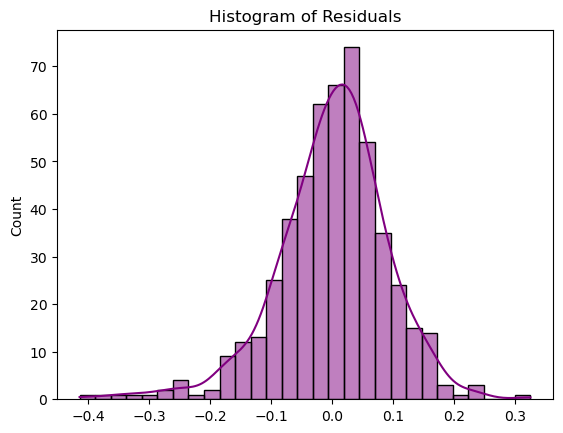

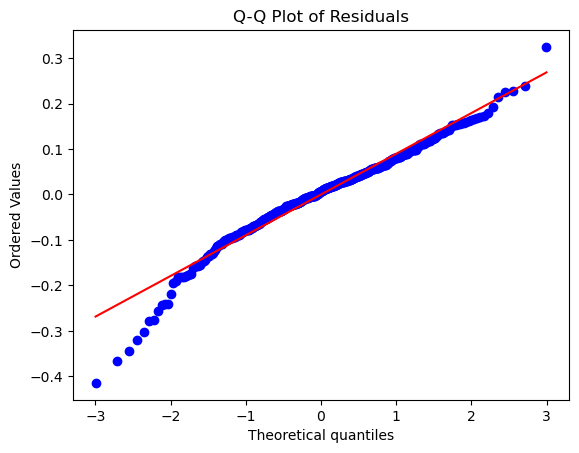

In [81]:
# Comapring plots with Q_Q plot
sns.histplot(residual, kde=True, color='purple')
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

- Using the Q-Q plot, we see that most data points lie on a straight line, indicating that the error terms follow a normal distribution.

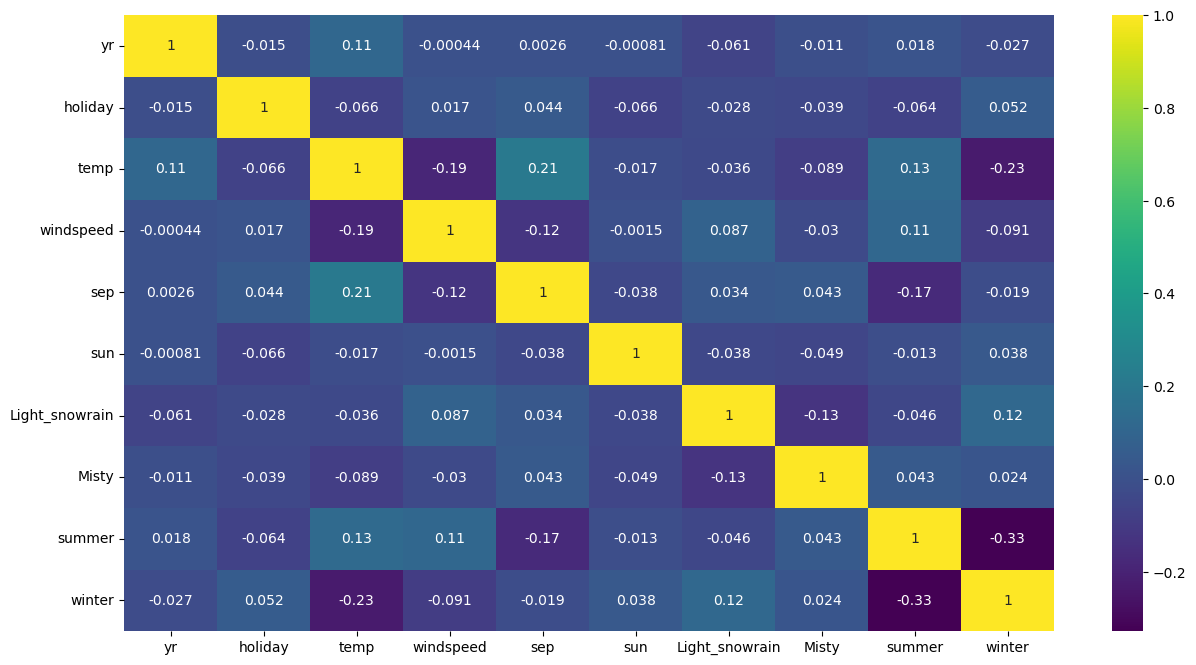

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap='viridis')
plt.show()

- The VIF values are below 5, and the heatmap shows no signs of multicollinearity.

### Step 7: Making predication using final build model
- After fitting the model and verifying the normality of the error terms, we can proceed to make predictions using the final model.

In [83]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [84]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [85]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [86]:
col1 = X_train_new.columns
X_test = X_test[col1]
X_test_lm6 = sm.add_constant(X_test)

In [87]:
y_pred = lr6.predict(X_test_lm6)

In [88]:
#Calculateding Rsquare
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7965

Text(0, 0.5, 'y_pred')

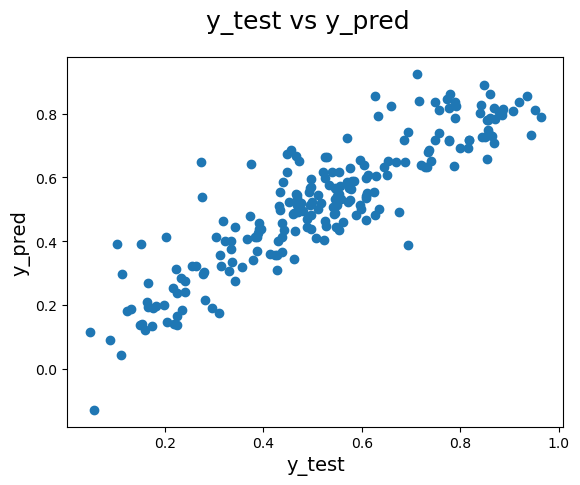

In [89]:
# plotting graph as y_test vs y_pred 
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14) 

In [90]:
# calculating Adjusted-R^2 value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7868


In [91]:
round(lr6.params,4)

const             0.1344
yr                0.2328
holiday          -0.1067
temp              0.5471
windspeed        -0.1531
sep               0.0994
sun              -0.0498
Light_snowrain   -0.2883
Misty            -0.0806
summer            0.0878
winter            0.1311
dtype: float64

### Conclusion:

1. Comparison between Train and Test datasets:
   - Train dataset R^2: 0.836
   - Train dataset Adjusted R^2 0.833
   - Test dataset R^2 : 0.7965
   - Test dataset Adjusted R^2 : 0.7868

2. Understading the final coefficient output: -> round(lr6.params,4)
    - const (0.1344): This is the intercept term. It represents the predicted value of the target variable (demand) when all other features are zero.
    - yr (0.2328): This coefficient shows the effect of the year (possibly coded as 0 or 1) on the demand. A value of 0.2328 means that for every one-unit increase in the year, the demand increases by 0.2328 units.
    - holiday (-0.1067): This coefficient suggests that holidays tend to decrease the demand by 0.1067 units, holding all other variables constant.
    - temp (0.5471): This indicates that an increase in temperature by one unit increases the demand by 0.5471 units, suggesting a positive relationship between temperature and bike demand.
    - windspeed (-0.1531): A negative coefficient, meaning that higher wind speed decreases the demand by 0.1531 units.
    - sep (0.0994): This represents the effect of September (likely a dummy variable for the month). It indicates a slight increase in demand bu 0.0994 units in September.
    - sun (-0.0498): A small negative effect, suggesting that more sunshine slightly reduces the demand by 0.0498 units.
    - Light_snowrain (-0.2883): This suggests that light snow or rain decreases the demand by 0.2883 units.
    - Misty (-0.0806): Misty weather reduces the demand by 0.0806 units.
    - summer (0.0878): This coefficient suggests that the summer season increases demand by 0.0878 units.
    - winter (0.1311): Winter increases demand by 0.1311 units, though slightly more than summer

3. Equation:

cnt = 0.1344 + 0.2328 * yr - 0.1067 * holiday + 0.5471 * temp - 0.1531 * windspeed + 0.0994 * sep - 0.0498 * sun - 0.2883 * Light_snowrain - 0.0806 * Misty + 0.0878 * summer + 0.1311 * winter

### Final Recommendation:
1.	temp: Temperature has the highest positive coefficient, indicating that higher temperatures strongly correlate with increased bike demand. 
2.	yr: The year variable suggests a substantial positive trend in bike demand over time, with 2019 seeing higher usage than 2018.
3.	Light_snowrain: This feature has the largest negative impact. Inclement weather (light snow or rain) significantly reduces bike demand, as adverse conditions discourage users.


### Points to be noted:
- The data has been cleaned to remove outliers that could negatively impact the model. 
- Multicollinearity has been checked and addressed. 
- Residual analysis has been performed, and the model meets the assumptions of linear regression (residuals are normally distributed and errors show homoscedasticity). 
- The Q-Q plot comparing the residual distribution with a normal distribution indicates that the residuals follow a normal distribution for all interpolations. Although extrapolations show some deviation, it does not affect the applicability of linear regression.






